# Assignment 02 - Kodikara U. S. S. 210293K (ENTC)

## 1. Logistic Regression

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")

df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])

df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[[ 'species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species', 'island', 'sex','class_encoded'] , axis =1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [7]:
y

0      0
1      0
2      0
4      0
5      0
      ..
215    1
216    1
217    1
218    1
219    1
Name: class_encoded, Length: 214, dtype: int32

In [8]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
215,55.8,19.8,207.0,4000.0
216,43.5,18.1,202.0,3400.0
217,49.6,18.2,193.0,3775.0
218,50.8,19.0,210.0,4100.0


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

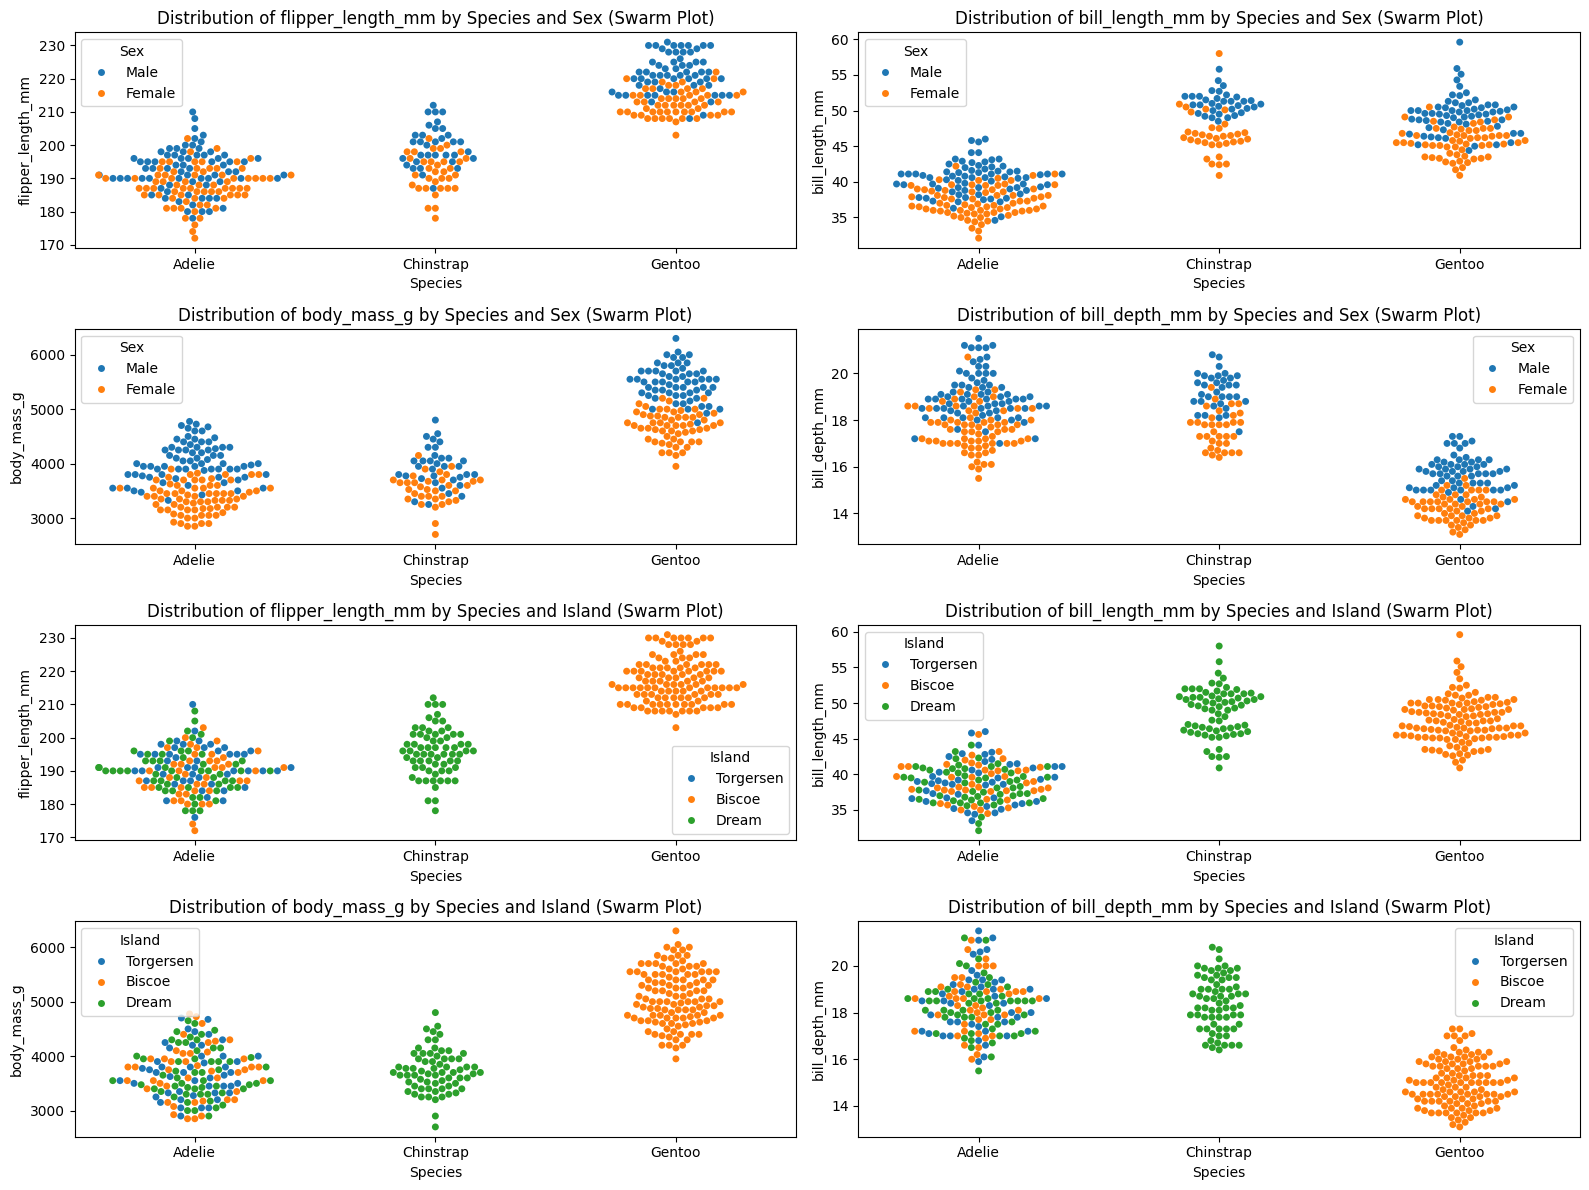

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Drop rows with missing values
df.dropna(inplace=True)

# Define the features to visualize
features = ['flipper_length_mm', 'bill_length_mm', 'body_mass_g', 'bill_depth_mm']

# Create a figure with subplots for Species vs. Sex
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.swarmplot(data=df, x='species', y=feature, hue='sex')
    plt.title(f'Distribution of {feature} by Species and Sex (Swarm Plot)')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.legend(title='Sex')

# Add the 4th plot for Species vs. Island for bill_length_mm
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i+4)
    sns.swarmplot(data=df, x='species', y=feature , hue='island')
    plt.title(f'Distribution of {feature} by Species and Island (Swarm Plot)')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.legend(title='Island')

plt.tight_layout()
plt.show()


In [12]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)
#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression( solver ='saga')
logreg.fit ( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( "Coefficients : ", logreg.coef_ , "Intercept : ", logreg.intercept_ )

Accuracy : 0.5813953488372093
Coefficients :  [[ 2.75492000e-03 -8.22235633e-05  4.57578125e-04 -2.86266519e-04]] Intercept :  [-8.51475192e-06]


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)
#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression(solver='liblinear')
logreg.fit ( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( "Coefficients : ", logreg.coef_ , "Intercept : ", logreg.intercept_ )

Accuracy : 1.0
Coefficients :  [[ 1.5966504  -1.4250108  -0.15238036 -0.00395099]] Intercept :  [-0.07554515]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# <<__ 1. Without Feature Scaling __>>

# 'liblinear' solver
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)

# 'saga' solver
logreg_saga = LogisticRegression(solver='saga')
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)

print("Without Feature Scaling:")
print(f"Accuracy with 'liblinear': {accuracy_liblinear}")
print(f"Accuracy with 'saga': {accuracy_saga}")

# <<__ 2. With Feature Scaling __>>

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 'liblinear' solver
logreg_liblinear_scaled = LogisticRegression(solver='liblinear')
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)

# 'saga' solver
logreg_saga_scaled = LogisticRegression(solver='saga')
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)

print("\nWith Feature Scaling:")
print(f"Accuracy with 'liblinear': {accuracy_liblinear_scaled}")
print(f"Accuracy with 'saga': {accuracy_saga_scaled}")


Without Feature Scaling:
Accuracy with 'liblinear': 1.0
Accuracy with 'saga': 0.5813953488372093

With Feature Scaling:
Accuracy with 'liblinear': 0.9767441860465116
Accuracy with 'saga': 0.9767441860465116


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
from tabulate import tabulate

# Results without feature scaling
results_without_scaling = [
    ['Solver', 'Accuracy'],
    ['liblinear', accuracy_liblinear],
    ['saga', accuracy_saga]
]

print("Without Feature Scaling:")
print(tabulate(results_without_scaling, headers='firstrow', tablefmt='grid'))

# Results with feature scaling
results_with_scaling = [
    ['Solver', 'Accuracy'],
    ['liblinear', accuracy_liblinear_scaled],
    ['saga', accuracy_saga_scaled]
]

print("\nWith Feature Scaling:")
print(tabulate(results_with_scaling, headers='firstrow', tablefmt='grid'))


Without Feature Scaling:
+-----------+------------+
| Solver    |   Accuracy |
+===========+============+
| liblinear |   1        |
+-----------+------------+
| saga      |   0.581395 |
+-----------+------------+

With Feature Scaling:
+-----------+------------+
| Solver    |   Accuracy |
+===========+============+
| liblinear |   0.976744 |
+-----------+------------+
| saga      |   0.976744 |
+-----------+------------+


In [20]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset ("penguins")
df.dropna( inplace = True )
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin( selected_classes )].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()
X = df_filtered.drop([ 'species', 'class_encoded'] , axis =1)
y = df_filtered['class_encoded'] # Target variable
X.head()
print(X.dtypes)  # Check data types of columns
print(X.head())  # Check the first few rows of the DataFrame
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)
logreg = LogisticRegression( solver ='saga')
logreg.fit( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print(" Accuracy :", accuracy )
print( logreg.coef_ , logreg.intercept_ )

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
0  Torgersen            39.1           18.7              181.0       3750.0  \
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
4  Torgersen            36.7           19.3              193.0       3450.0   
5  Torgersen            39.3           20.6              190.0       3650.0   

      sex  
0    Male  
1  Female  
2  Female  
4  Female  
5    Male  


ValueError: could not convert string to float: 'Dream'

In [19]:
print(X.dtypes)  # Check data types of columns
print(X.head())  # Check the first few rows of the DataFrame

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
0  Torgersen            39.1           18.7              181.0       3750.0  \
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
4  Torgersen            36.7           19.3              193.0       3450.0   
5  Torgersen            39.3           20.6              190.0       3650.0   

      sex  
0    Male  
1  Female  
2  Female  
4  Female  
5    Male  


In [24]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset ("penguins")
df.dropna( inplace = True )
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin( selected_classes )].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()
X = df_filtered.drop([ 'species', 'class_encoded', 'island' , 'sex'] , axis =1)
y = df_filtered['class_encoded'] # Target variable
X.head()
print(X.dtypes)  # Check data types of columns
print(X.head())  # Check the first few rows of the DataFrame
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)
logreg = LogisticRegression( solver ='saga')
logreg.fit( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print(" Accuracy :", accuracy )
print( logreg.coef_ , logreg.intercept_ )

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0
 Accuracy : 0.5813953488372093
[[ 2.76829027e-03 -8.24549384e-05  4.87778893e-04 -2.87933997e-04]] [-8.38493522e-06]


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 2. Logistic regression on real world data

In [33]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [34]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


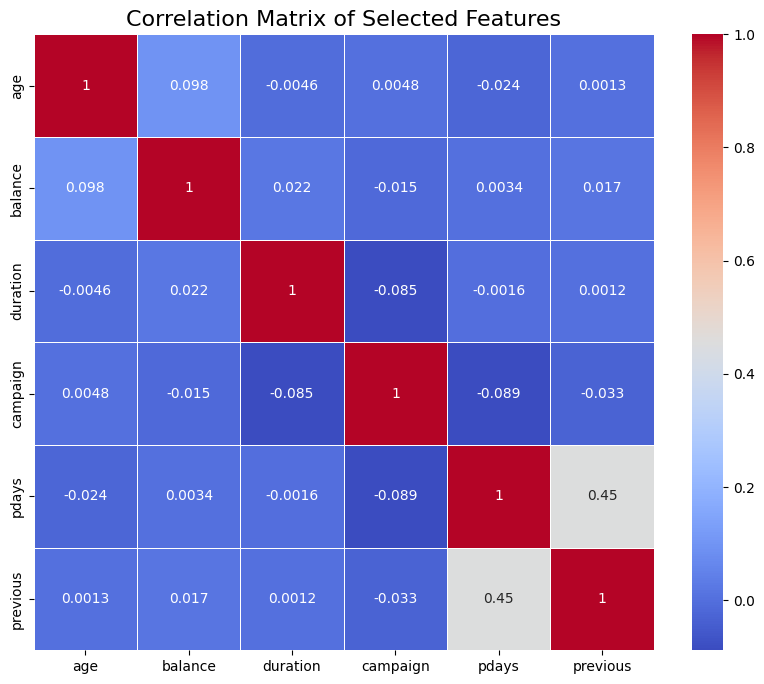

Correlation Matrix:
               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


In [35]:
import matplotlib.pyplot as plt

# Combine the features and targets into a single DataFrame for analysis
data = pd.concat([X, y], axis=1)

selected_features = ['age','balance','duration','campaign','pdays','previous']

# Compute the correlation matrix
correlation_matrix = data[selected_features].corr()

plt.figure( figsize =(10 , 8)) # Set the figure size
sns.heatmap (correlation_matrix , annot = True , cmap ='coolwarm',linewidths =0.5) # Create a heatmap

plt.title("Correlation Matrix of Selected Features", fontsize =16)

# Show the heatmap
plt.show ()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

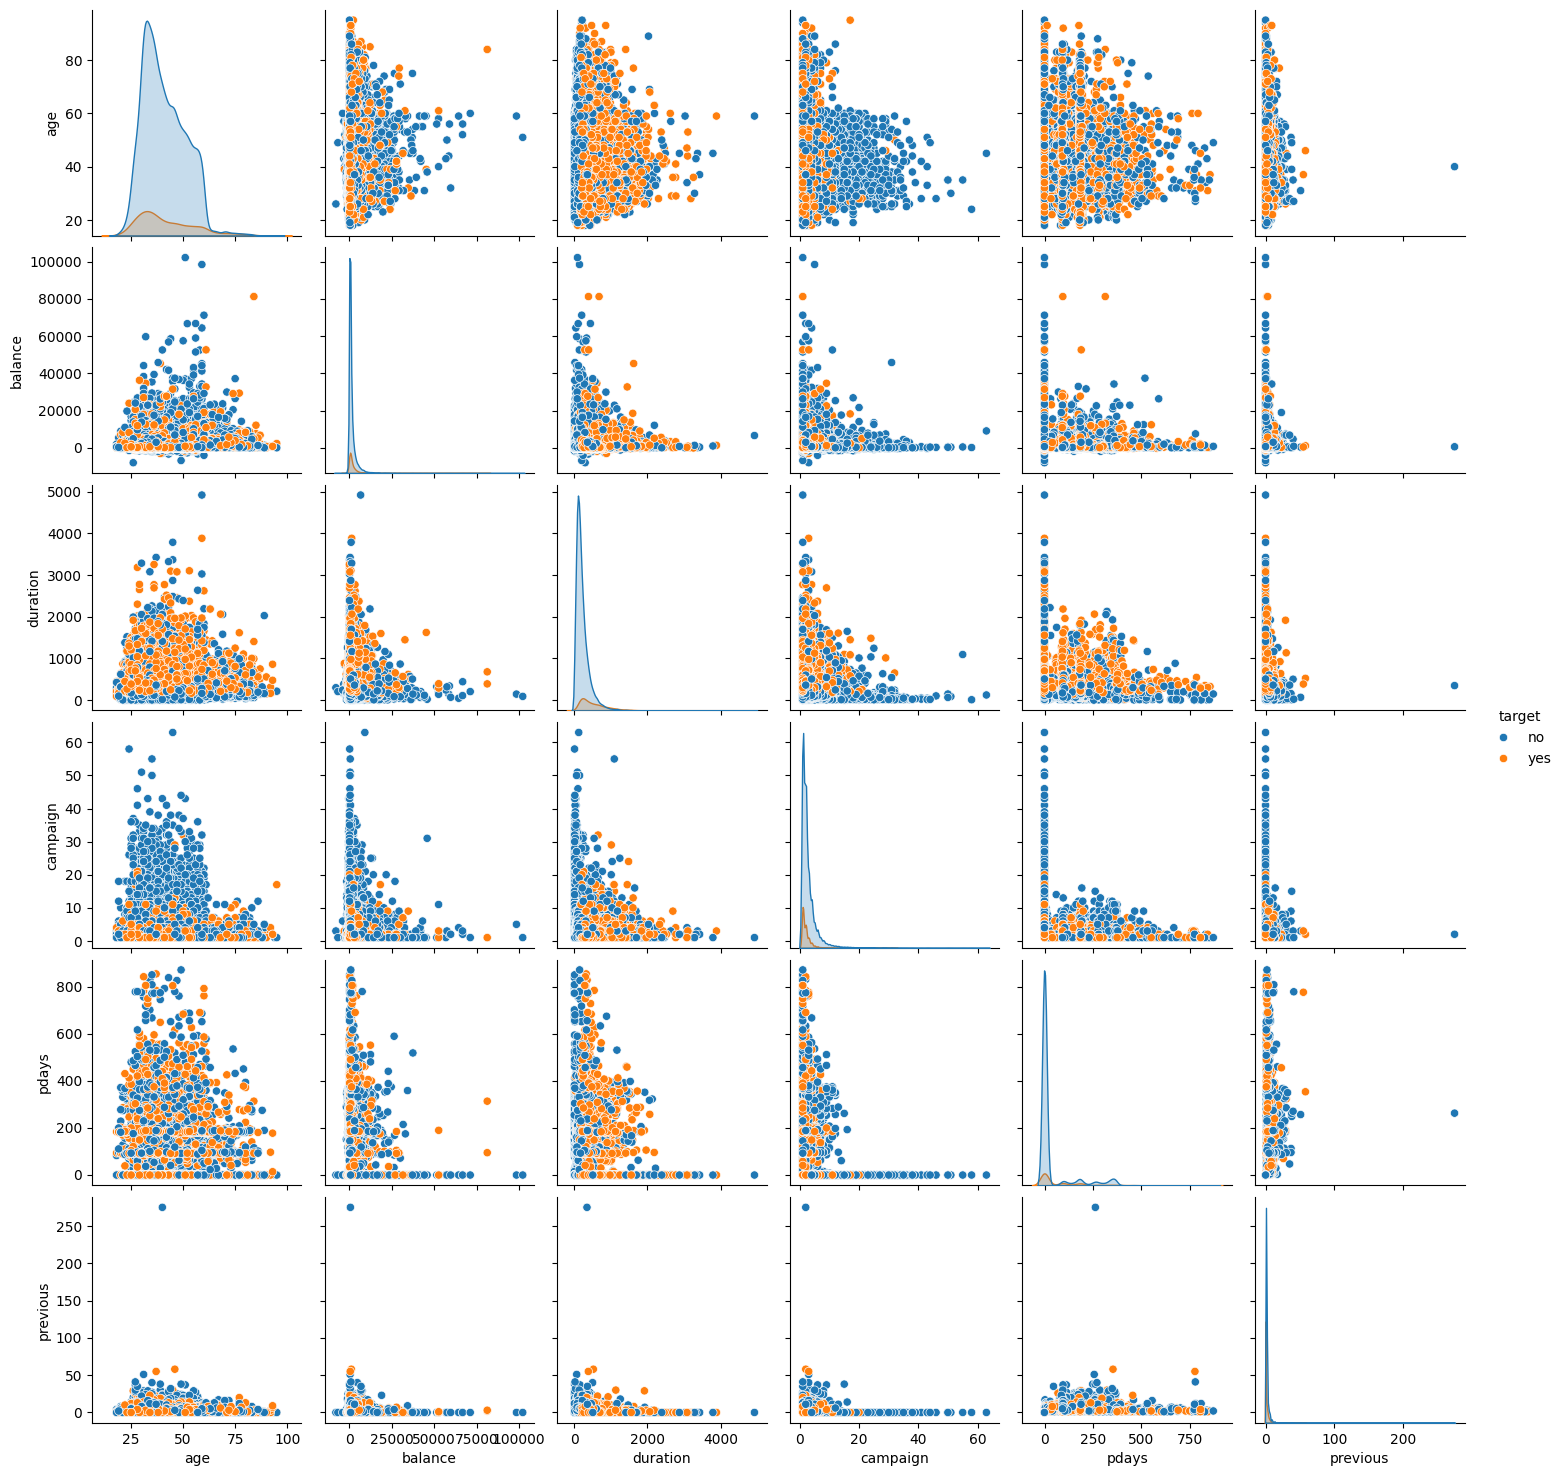

In [36]:
data['target'] = y  # Add the target variable to the DataFrame
pairplot = data[selected_features + ['target']]  # Select the features and target variable

# Create a pairplot
sns.pairplot(pairplot, hue='target', diag_kind='kde')

plt.show()

In [45]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

X = data[selected_features] # Features

X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =50)

#Fit the Logistic Regression model
model = LogisticRegression(max_iter=200) 
model.fit( X_train , y_train )

# Make predictions
y_pred = model.predict ( X_test )

# Evaluate the m o d e l s performance

accuracy = accuracy_score( y_test , y_pred )
conf_matrix = confusion_matrix( y_test , y_pred )
class_report = classification_report( y_test , y_pred )

print( f"Accuracy : { accuracy :.2f}")
print("Confusion Matrix :")
print(conf_matrix)
print("Classification Report :")
print(class_report)

Accuracy : 0.89
Confusion Matrix :
[[7876  129]
 [ 859  179]]
Classification Report :
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      8005
         yes       0.58      0.17      0.27      1038

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



In [44]:
# Check if y is a DataFrame with more than one column - I wrote this as I experienced some errors while implementing the code

print(y.head())  # Display the first few rows of y

if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Select the first column (adjust if necessary)

# Ensure y is numeric (binary 0/1)
y_numeric = y.apply(lambda x: 1 if x == 'yes' else 0)  

# Add a constant to the model (intercept term)
X_const = sm.add_constant(X_encoded)

# Fit the Logistic Regression model using statsmodels
logit_model = sm.Logit(y_numeric, X_const)
result = logit_model.fit()

# Summary of the model, including p-values
print(result.summary())

# Extract p-values
p_values = result.pvalues
print("\nP-values for the predictors:")
print(p_values)

# Check if any features have high p-values (suggesting they can be discarded)
alpha = 0.05  # threshold for significance level
insignificant_features = p_values[p_values > alpha].index
print(f"\nFeatures with p-values > {alpha} (can potentially be discarded):")
print(insignificant_features)


0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
Optimization terminated successfully.
         Current function value: 0.293213
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.1875
Time:                        08:03:29   Log-Likelihood:                -13256.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4952      0.071    -49.538  

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed (0)
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np.dot(X , transformation )

X,y

(array([[-2.19655439, -6.04817613],
        [ 0.81789766,  4.8792503 ],
        [ 2.8314302 ,  5.80299161],
        ...,
        [-3.26670243, -2.62516778],
        [ 2.23050411,  4.08324346],
        [ 0.81695873,  4.89150137]]),
 array([0, 1, 1, ..., 0, 1, 1]))

In [62]:
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Transformation to add more complexity to the data
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Add a bias term (column of ones)
X = np.c_[np.ones(X.shape[0]), X]  # Adding bias to the input

# Initialize weights randomly with a small value
np.random.seed(1)
weights = np.random.normal(0, 0.01, X.shape[1])

# Set hyperparameters
learning_rate = 0.01
n_iterations = 20

# To store the loss over iterations
bgd_losses = []

# Batch Gradient Descent
for iteration in range(n_iterations):
    # Compute the predictions (linear combination of weights and input features)
    predictions = X.dot(weights)
    
    # Compute Mean Squared Error (MSE) Loss
    loss = np.mean((predictions - y) ** 2)
    bgd_losses.append(loss)
    
    # Calculate gradients
    gradients = (2 / X.shape[0]) * X.T.dot(predictions - y)
    
    # Update the weights using the gradient descent rule
    weights -= learning_rate * gradients
    
    # Print loss at each iteration for tracking progress
    print(f"Iteration {iteration + 1}/{n_iterations}, Loss: {loss:.4f}")

Iteration 1/20, Loss: 0.5210
Iteration 2/20, Loss: 0.2821
Iteration 3/20, Loss: 0.1939
Iteration 4/20, Loss: 0.1593
Iteration 5/20, Loss: 0.1439
Iteration 6/20, Loss: 0.1356
Iteration 7/20, Loss: 0.1298
Iteration 8/20, Loss: 0.1252
Iteration 9/20, Loss: 0.1212
Iteration 10/20, Loss: 0.1174
Iteration 11/20, Loss: 0.1140
Iteration 12/20, Loss: 0.1107
Iteration 13/20, Loss: 0.1076
Iteration 14/20, Loss: 0.1047
Iteration 15/20, Loss: 0.1019
Iteration 16/20, Loss: 0.0993
Iteration 17/20, Loss: 0.0968
Iteration 18/20, Loss: 0.0944
Iteration 19/20, Loss: 0.0921
Iteration 20/20, Loss: 0.0899


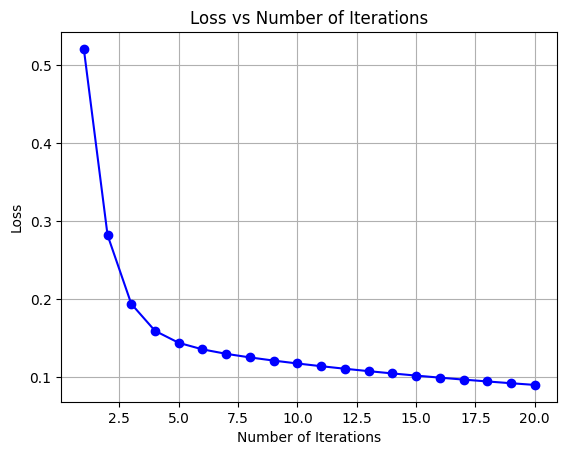

In [63]:
# Plot the loss with respect to the number of iterations
plt.plot(range(1, n_iterations + 1), bgd_losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Iteration 1/20, Loss: 0.0186
Iteration 2/20, Loss: 0.0141
Iteration 3/20, Loss: 0.0141
Iteration 4/20, Loss: 0.0141
Iteration 5/20, Loss: 0.0141
Iteration 6/20, Loss: 0.0141
Iteration 7/20, Loss: 0.0141
Iteration 8/20, Loss: 0.0141
Iteration 9/20, Loss: 0.0141
Iteration 10/20, Loss: 0.0141
Iteration 11/20, Loss: 0.0141
Iteration 12/20, Loss: 0.0141
Iteration 13/20, Loss: 0.0141
Iteration 14/20, Loss: 0.0141
Iteration 15/20, Loss: 0.0141
Iteration 16/20, Loss: 0.0141
Iteration 17/20, Loss: 0.0141
Iteration 18/20, Loss: 0.0141
Iteration 19/20, Loss: 0.0141
Iteration 20/20, Loss: 0.0141


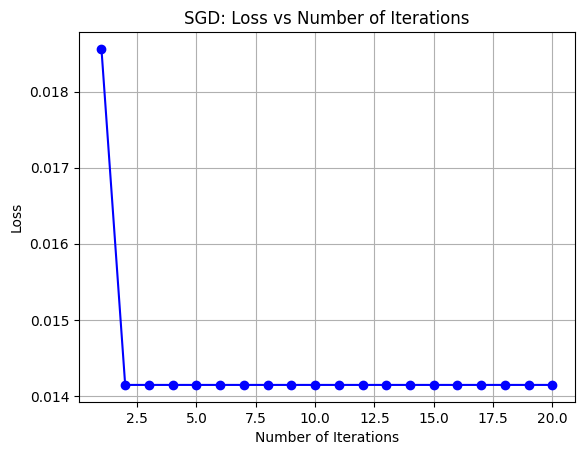

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add a bias term to X (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights randomly
np.random.seed(1)
weights = np.random.normal(0, 0.01, X.shape[1])

# Hyperparameters
learning_rate = 0.01
n_iterations = 20

# To store the loss over iterations
sgd_losses = []

# Stochastic Gradient Descent
for iteration in range(n_iterations):
    total_loss = 0  # Track loss for the current iteration

    # Loop through each data point
    for i in range(X.shape[0]):
        # Get a single data point
        x_i = X[i, :]
        y_i = y[i]

        # Prediction for a single data point
        prediction = np.dot(x_i, weights)

        # Calculate the loss (Mean Squared Error for this point)
        loss = (prediction - y_i) ** 2
        total_loss += loss

        # Calculate the gradient for this data point
        gradient = 2 * x_i * (prediction - y_i)

        # Update weights using the gradient
        weights -= learning_rate * gradient

    # Average loss over all data points for this iteration
    avg_loss = total_loss / X.shape[0]
    sgd_losses.append(avg_loss)

    # Print the average loss for each iteration
    print(f"Iteration {iteration + 1}/{n_iterations}, Loss: {avg_loss:.4f}")

# Plot the loss with respect to the number of iterations
plt.plot(range(1, n_iterations + 1), sgd_losses, marker='o', linestyle='-', color='b')
plt.title('SGD: Loss vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Iteration 1, Loss: 0.7106
Iteration 2, Loss: 0.1451
Iteration 3, Loss: 0.0527
Iteration 4, Loss: 0.0203
Iteration 5, Loss: 0.0080
Iteration 6, Loss: 0.0032
Iteration 7, Loss: 0.0013
Iteration 8, Loss: 0.0005
Iteration 9, Loss: 0.0002
Iteration 10, Loss: 0.0001
Iteration 11, Loss: 0.0000
Iteration 12, Loss: 0.0000
Iteration 13, Loss: 0.0000
Iteration 14, Loss: 0.0000
Iteration 15, Loss: 0.0000
Iteration 16, Loss: 0.0000
Iteration 17, Loss: 0.0000
Iteration 18, Loss: 0.0000
Iteration 19, Loss: 0.0000
Iteration 20, Loss: 0.0000


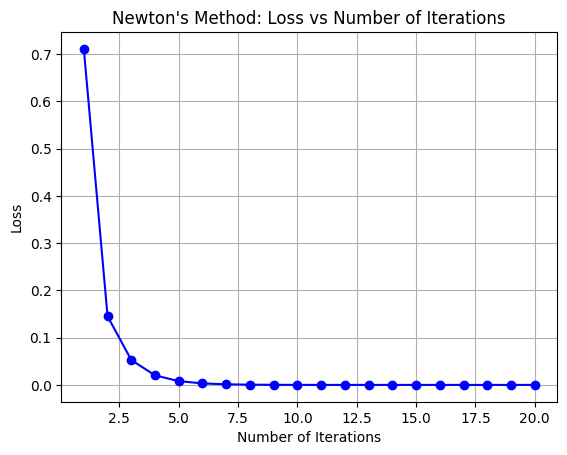

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add a bias term to X (column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights randomly
np.random.seed(1)
weights = np.random.normal(0, 0.01, X.shape[1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations
iterations = 20
loss_history_newton = []
m = X.shape[0]  # Number of samples

# Newton's Method
for i in range(iterations):
    # Calculate predictions
    predictions = sigmoid(np.dot(X, weights))

    # Compute the error
    error = predictions - y

    # Compute the loss (Log-Likelihood)
    loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_history_newton.append(loss)

    # Compute the gradient (first derivative)
    gradient = np.dot(X.T, error)

    # Compute the Hessian (second derivative)
    diag = predictions * (1 - predictions)  # Derivative of sigmoid
    hessian = np.dot(X.T, np.dot(np.diag(diag), X))

    # Update weights using Newton’s method: W = W - H^(-1) * gradient
    weights -= np.dot(np.linalg.inv(hessian), gradient)

    # Print the loss at each iteration
    print(f"Iteration {i + 1}, Loss: {loss:.4f}")

# Plot the loss with respect to the number of iterations
plt.plot(range(1, iterations + 1), loss_history_newton, marker='o', linestyle='-', color='b')
plt.title("Newton's Method: Loss vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


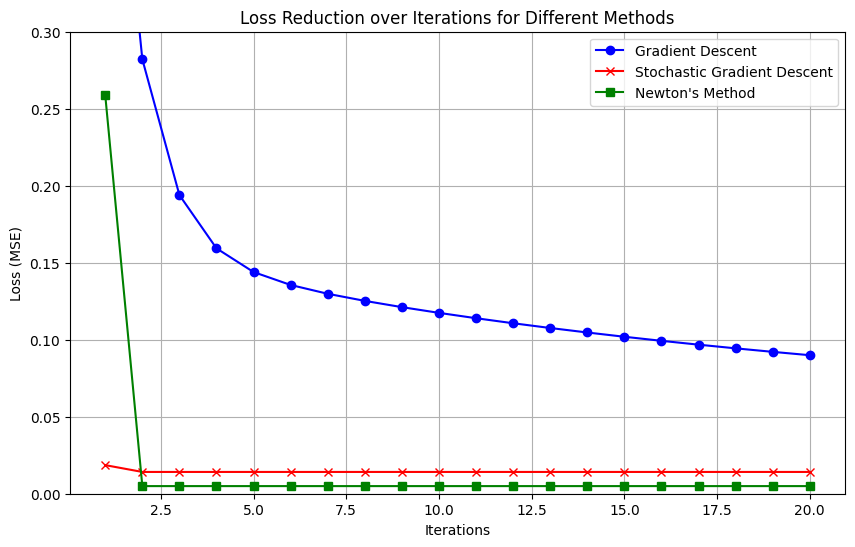

In [69]:
# Plotting the loss for each method
plt.figure(figsize=(10, 6))
plt.plot(range(1,iterations + 1), bgd_losses, marker='o', linestyle='-', color='b', label='Gradient Descent')
plt.plot(range(1,iterations + 1), sgd_losses, marker='x', linestyle='-', color='r', label='Stochastic Gradient Descent')
plt.plot(range(1,iterations + 1), loss_history_newton, marker='s', linestyle='-', color='g', label='Newton\'s Method')

plt.title("Loss Reduction over Iterations for Different Methods")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.ylim(0, 0.3)  # Adjust y-axis limit to see more details
plt.grid(True)
plt.legend()
plt.show()


Iteration 1/20, Loss: 0.5228
Iteration 2/20, Loss: 0.2832
Iteration 3/20, Loss: 0.1948
Iteration 4/20, Loss: 0.1617
Iteration 5/20, Loss: 0.1487
Iteration 6/20, Loss: 0.1431
Iteration 7/20, Loss: 0.1403
Iteration 8/20, Loss: 0.1384
Iteration 9/20, Loss: 0.1371
Iteration 10/20, Loss: 0.1358
Iteration 11/20, Loss: 0.1347
Iteration 12/20, Loss: 0.1337
Iteration 13/20, Loss: 0.1327
Iteration 14/20, Loss: 0.1318
Iteration 15/20, Loss: 0.1309
Iteration 16/20, Loss: 0.1301
Iteration 17/20, Loss: 0.1293
Iteration 18/20, Loss: 0.1285
Iteration 19/20, Loss: 0.1278
Iteration 20/20, Loss: 0.1271


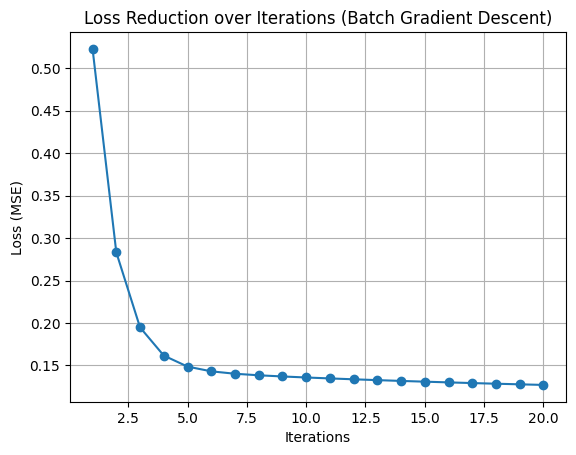

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with updated centers
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Add a bias term to X
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the bias

# Initialize weights randomly
np.random.seed(1)
weights = np.random.normal(0, 0.01, X.shape[1])  # Small random values

# Hyperparameters
learning_rate = 0.01
n_iterations = 20
loss_history = []

# Batch Gradient Descent
for iteration in range(n_iterations):
    # Predictions
    predictions = X.dot(weights)
    
    # Calculate the loss (Mean Squared Error)
    error = predictions - y
    loss = np.mean((error) ** 2)
    loss_history.append(loss)
    
    # Calculate the gradients
    gradients = (2 / X.shape[0]) * X.T.dot(error)
    
    # Update weights
    weights -= learning_rate * gradients
    
    # Print the loss for every iteration
    print(f"Iteration {iteration + 1}/{n_iterations}, Loss: {loss:.4f}")

# Plotting the loss history
plt.plot(range(1, n_iterations + 1), loss_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss Reduction over Iterations (Batch Gradient Descent)')
plt.grid()
plt.show()